# Explore unicity distance for GTDB rs207

[Unicity distance](https://en.wikipedia.org/wiki/Unicity_distance) for genomes; tentatively defined as "How many sourmash hashes does it take to classify a genome uniquely?"

In [44]:
from collections import defaultdict
from sourmash.lca import lca_utils

In [1]:
import csv

def read_unicity_file(filename):
    d = {}
    with open(filename, newline="") as fp:
        r = csv.reader(fp)
        for n, row in enumerate(r):
            #if n > 100000: break
            ident = row[0]
            unicity_trace = list(map(int, row[2:]))
            d[ident] = unicity_trace
    return d

In [2]:
UNICITY_CSV = 'gtdb-rs207.genomic.k31.unicity.csv'
d = read_unicity_file(UNICITY_CSV)

In [3]:
n_unique = 0
n_infinite = 0
for k, v in d.items():
    if v[-1] != 1:
        n_infinite += 1
        #print(len(v), v[-3:])
    if len(v) == 1:
        n_unique += 1

print(f"Looked at {len(d)} genomes total, in '{UNICITY_CSV}'")
print(f"{n_unique / len(d) * 100:.01f}% of genomes have unicity distance of 1; {n_infinite * 100 / len(d):.01f}% have an infinite unicity distance")
print(n_unique)
print(n_infinite)

Looked at 317542 genomes total, in 'gtdb-rs207.genomic.k31.unicity.csv'
15.3% of genomes have unicity distance of 1; 29.2% have an infinite unicity distance
48630
92564


In [4]:
z = []
z2 = []
for k, v in d.items():
    z.append(len(v))
    is_infinite = bool(v[-1] != 1)
    z2.append(dict(ident=k, unicity=len(v), is_infinite=is_infinite))

In [5]:
import pandas as pd
df = pd.DataFrame(z2)
df

,ident,unicity,is_infinite
0,GCF_000814905.1,1,False
1,GCA_007116955.1,3,False
2,GCF_017948435.1,27,False
3,GCA_017995835.1,1,False
4,GCF_001981135.1,361,False
...,...,...,...
317537,GCA_019115945.1,147,True
317538,GCF_003849745.1,6,False
317539,GCA_903892235.1,124,False
317540,GCF_002317655.1,535,True


In [6]:
df.describe()

,unicity
count,317542.000000
mean,144.710756
std,187.921327
min,1.000000
25%,5.000000
50%,34.000000
75%,253.000000
max,1249.000000


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt


(array([125272., 149168., 163007., 172187., 179200., 184341., 189071.,
        192891., 196983., 200048., 202932., 205245., 207880., 211399.,
        216009., 220079., 223381., 227064., 232956., 237557., 241939.,
        248931., 252746., 255208., 257411., 259311., 260965., 262240.,
        263261., 265159., 266372., 268436., 272870., 278585., 280298.,
        281864., 284129., 287909., 291337., 295497., 298197., 300508.,
        302283., 304441., 306892., 309244., 310125., 310932., 311495.,
        312038., 312775., 313361., 313845., 314157., 314573., 315121.,
        315654., 316141., 316397., 316574., 316721., 316804., 316915.,
        317004., 317091., 317175., 317212., 317270., 317315., 317350.,
        317381., 317411., 317431., 317455., 317472., 317489., 317493.,
        317502., 317508., 317509., 317510., 317517., 317523., 317525.,
        317527., 317527., 317528., 317533., 317536., 317538., 317538.,
        317538., 317538., 317540., 317540., 317540., 317541., 317541.,
      

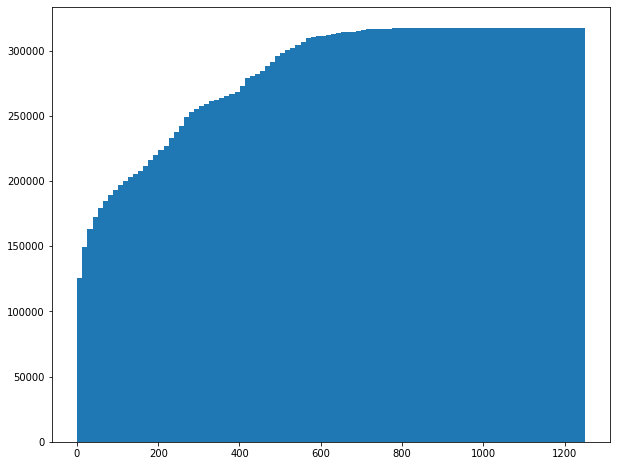

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.hist(z, cumulative=True, bins=100)

## Taxonomy

In [9]:
from sourmash.tax.tax_utils import MultiLineageDB, get_ident
tax_db = MultiLineageDB.load(['../sourmash/gtdb-rs207.taxonomy.sqldb'])

def get_genus(ident):
    ident = get_ident(ident) # trim
    lintup = tax_db[ident]
    while lintup[-1].rank != 'genus':
        lintup = lintup[:-1]
        
    assert lintup
    return lintup[-1].name

def get_species(ident):
    ident = get_ident(ident) # trim
    lintup = tax_db[ident]
    while lintup[-1].rank != 'species':
        lintup = lintup[:-1]
        
    assert lintup
    return lintup[-1].name

In [10]:
df['genus'] = df['ident'].apply(get_genus)
df['species'] = df['ident'].apply(get_species)

In [11]:
inf_df = df[df['is_infinite']]

In [12]:
print(inf_df['species'].value_counts()[:20].to_markdown())

|                               |   species |
|:------------------------------|----------:|
| s__Staphylococcus aureus      |      8367 |
| s__Salmonella enterica        |      7602 |
| s__Escherichia coli           |      6324 |
| s__Streptococcus pneumoniae   |      5513 |
| s__Mycobacterium tuberculosis |      5485 |
| s__Klebsiella pneumoniae      |      4428 |
| s__Acinetobacter baumannii    |      2519 |
| s__Pseudomonas aeruginosa     |      1873 |
| s__Streptococcus pyogenes     |      1399 |
| s__Listeria monocytogenes     |      1207 |
| s__Mycobacterium abscessus    |      1139 |
| s__Listeria monocytogenes_B   |      1097 |
| s__Clostridioides difficile   |       958 |
| s__Burkholderia mallei        |       937 |
| s__Neisseria meningitidis     |       893 |
| s__Streptococcus suis         |       890 |
| s__Wolbachia pipientis        |       869 |
| s__Pseudomonas_E viridiflava  |       855 |
| s__Vibrio cholerae            |       854 |
| s__Enterococcus_B faecium     | 

In [13]:
print(inf_df['species'].value_counts()[-20:].to_markdown())

|                                   |   species |
|:----------------------------------|----------:|
| s__JAHJIW01 sp018823125           |         1 |
| s__Ardenticatena maritima         |         1 |
| s__Pseudomonas_D salina           |         1 |
| s__Arthrobacter_E woluwensis      |         1 |
| s__Longimicrobium terrae          |         1 |
| s__Corynebacterium pilosum        |         1 |
| s__Dickeya chrysanthemi           |         1 |
| s__Marinirhabdus sp002375495      |         1 |
| s__Echinicola rosea               |         1 |
| s__TMED25 sp016780665             |         1 |
| s__XYB1-FULL-32-11 sp903854535    |         1 |
| s__UBA2277 sp903886255            |         1 |
| s__Flavobacterium sp004634195     |         1 |
| s__Chlorobium phaeoclathratiforme |         1 |
| s__Salinicoccus roseus            |         1 |
| s__Cedecea neteri                 |         1 |
| s__Microbacterium paraoxydans     |         1 |
| s__Streptococcus himalayensis     |         1 |


In [14]:
print(inf_df['genus'].value_counts()[:20].to_markdown())

|                    |   genus |
|:-------------------|--------:|
| g__Streptococcus   |    9682 |
| g__Staphylococcus  |    9476 |
| g__Salmonella      |    7700 |
| g__Mycobacterium   |    6875 |
| g__Escherichia     |    6383 |
| g__Klebsiella      |    5032 |
| g__Acinetobacter   |    2772 |
| g__Listeria        |    2456 |
| g__Pseudomonas     |    1900 |
| g__Pseudomonas_E   |    1875 |
| g__Vibrio          |    1794 |
| g__Burkholderia    |    1654 |
| g__Neisseria       |    1397 |
| g__Campylobacter_D |    1389 |
| g__Enterococcus_B  |    1178 |
| g__Clostridioides  |     960 |
| g__Bordetella      |     938 |
| g__Francisella     |     906 |
| g__Wolbachia       |     905 |
| g__Enterococcus    |     787 |


In [15]:
print(inf_df['genus'].value_counts()[-20:].to_markdown())

|                     |   genus |
|:--------------------|--------:|
| g__2-01-FULL-38-13  |       1 |
| g__UBA6175          |       1 |
| g__Bisgaardia       |       1 |
| g__SR-FBR-E99       |       1 |
| g__Longimicrobium   |       1 |
| g__1-14-0-20-42-23  |       1 |
| g__WRGU01           |       1 |
| g__Halogeometricum  |       1 |
| g__XYB1-FULL-32-11  |       1 |
| g__Arthrobacter_E   |       1 |
| g__JAHJIW01         |       1 |
| g__2-02-FULL-40-12  |       1 |
| g__Fischerella      |       1 |
| g__WO2-46-25        |       1 |
| g__Wagnerdoeblera   |       1 |
| g__UBA2361          |       1 |
| g__Ornithobacterium |       1 |
| g__UBA4765          |       1 |
| g__Anoxybacillus_A  |       1 |
| g__Borkfalkia       |       1 |


In [16]:
staph_df = inf_df[inf_df['species'] == 's__Staphylococcus aureus']
print(len(staph_df))

with open('staph_inf.csv', 'w', newline="") as fp:
    w = csv.writer(fp)
    w.writerow(['ident'])
    for ident in staph_df.ident:
        w.writerow([ident])

staph_df

8367


,ident,unicity,is_infinite,genus,species
170,GCF_003423725.1,248,True,g__Staphylococcus,s__Staphylococcus aureus
176,GCF_900017645.1,264,True,g__Staphylococcus,s__Staphylococcus aureus
199,GCF_000564935.1,260,True,g__Staphylococcus,s__Staphylococcus aureus
203,GCF_900038455.1,264,True,g__Staphylococcus,s__Staphylococcus aureus
222,GCF_000546145.1,272,True,g__Staphylococcus,s__Staphylococcus aureus
...,...,...,...,...,...
317422,GCF_000162695.1,252,True,g__Staphylococcus,s__Staphylococcus aureus
317424,GCF_000570875.1,271,True,g__Staphylococcus,s__Staphylococcus aureus
317430,GCF_000573525.1,271,True,g__Staphylococcus,s__Staphylococcus aureus
317466,GCF_001196435.1,271,True,g__Staphylococcus,s__Staphylococcus aureus


In [17]:
bork_df = inf_df[inf_df['species'] == 's__Borkfalkia excrementavium']
print(len(bork_df))

with open('bork_inf.csv', 'w', newline="") as fp:
    w = csv.writer(fp)
    w.writerow(['ident'])
    for ident in bork_df.ident:
        w.writerow([ident])

bork_df

1


,ident,unicity,is_infinite,genus,species
317537,GCA_019115945.1,147,True,g__Borkfalkia,s__Borkfalkia excrementavium


## are there any species with infinite unicity?

In [18]:
inf_df

,ident,unicity,is_infinite,genus,species
6,GCF_001084125.1,204,True,g__Neisseria,s__Neisseria gonorrhoeae
12,GCA_900478005.2,405,True,g__Acinetobacter,s__Acinetobacter baumannii
14,GCF_002088895.1,314,True,g__Gilliamella,s__Gilliamella apicola
16,GCA_004116405.1,517,True,g__Halegenticoccus,s__Halegenticoccus sp004116405
17,GCF_003117635.1,493,True,g__Salmonella,s__Salmonella enterica
...,...,...,...,...,...
317527,GCF_900022225.1,245,True,g__Streptococcus,s__Streptococcus pneumoniae
317528,GCF_002191595.1,326,True,g__Brucella,s__Brucella melitensis
317536,GCA_001430905.1,126,True,g__Peribacter,s__Peribacter riflensis
317537,GCA_019115945.1,147,True,g__Borkfalkia,s__Borkfalkia excrementavium


In [37]:
tax_inf_above = defaultdict(list)

for row in df.itertuples():
    ident = get_ident(row.ident)
    is_infinite = row.is_infinite

    tax = tax_db[ident]
    assert tax[-1].rank == 'species'
    
    while tax:
        tax_inf_above[tax].append(is_infinite)
        tax = tax[:-1]

In [59]:
n_rank_inf = defaultdict(int)
n_rank_total = defaultdict(int)

hist_count_members = defaultdict(int)
list_all = []

for tax, v in tax_inf_above.items():
    rank = tax[-1].rank
    n_rank_total[rank] += 1
    if all(v): #  _all_ taxa beneath this rank are infinite unicity!
        n_rank_inf[rank] += 1
        
        n_members = len(v)
        hist_count_members[n_members] += 1
        if n_members > 6 and rank != 'species':
            print(n_members, lca_utils.display_lineage(tax))
        list_all.append((n_members, tax[-1].rank, tax))

for k, total_count in n_rank_total.items():
        inf_count = n_rank_inf.get(k, 0)
        print(f"there are {inf_count} {k} with infinite unicity, out of total of {total_count}")

for k, v in sorted(hist_count_members.items()):
    print('**', k, v)


11 d__Bacteria;p__Patescibacteria;c__ABY1;o__BM507;f__UBA12075;g__UBA12075
there are 1083 species with infinite unicity, out of total of 65703
there are 73 genus with infinite unicity, out of total of 16686
there are 8 family with infinite unicity, out of total of 4107
there are 4 order with infinite unicity, out of total of 1593
there are 0 class with infinite unicity, out of total of 481
there are 0 phylum with infinite unicity, out of total of 189
there are 0 superkingdom with infinite unicity, out of total of 2
** 2 977
** 3 112
** 4 54
** 5 5
** 6 9
** 7 4
** 8 1
** 9 1
** 10 1
** 11 2
** 16 1
** 24 1


In [56]:
65703 - 1083

64620

In [57]:
64620 / 67503

0.9572907870761299

In [62]:
list_all.sort(reverse=True)
list_all[:50]


[(24,
  'species',
  (LineagePair(rank='superkingdom', name='d__Bacteria'),
   LineagePair(rank='phylum', name='p__Proteobacteria'),
   LineagePair(rank='class', name='c__Gammaproteobacteria'),
   LineagePair(rank='order', name='o__Francisellales'),
   LineagePair(rank='family', name='f__Francisellaceae'),
   LineagePair(rank='genus', name='g__Francisella'),
   LineagePair(rank='species', name='s__Francisella noatunensis'))),
 (16,
  'species',
  (LineagePair(rank='superkingdom', name='d__Bacteria'),
   LineagePair(rank='phylum', name='p__Proteobacteria'),
   LineagePair(rank='class', name='c__Alphaproteobacteria'),
   LineagePair(rank='order', name='o__Rhodobacterales'),
   LineagePair(rank='family', name='f__Rhodobacteraceae'),
   LineagePair(rank='genus', name='g__Sulfitobacter'),
   LineagePair(rank='species', name='s__Sulfitobacter mediterraneus_A'))),
 (11,
  'species',
  (LineagePair(rank='superkingdom', name='d__Bacteria'),
   LineagePair(rank='phylum', name='p__Patescibacteria

In [64]:
list_all.sort(reverse=True)

[ x for x in list_all if x[2][-1].rank != 'species' ]


[(11,
  'genus',
  (LineagePair(rank='superkingdom', name='d__Bacteria'),
   LineagePair(rank='phylum', name='p__Patescibacteria'),
   LineagePair(rank='class', name='c__ABY1'),
   LineagePair(rank='order', name='o__BM507'),
   LineagePair(rank='family', name='f__UBA12075'),
   LineagePair(rank='genus', name='g__UBA12075'))),
 (5,
  'genus',
  (LineagePair(rank='superkingdom', name='d__Bacteria'),
   LineagePair(rank='phylum', name='p__Patescibacteria'),
   LineagePair(rank='class', name='c__ABY1'),
   LineagePair(rank='order', name='o__BM507'),
   LineagePair(rank='family', name='f__UBA12075'),
   LineagePair(rank='genus', name='g__XYC2-34-220'))),
 (4,
  'genus',
  (LineagePair(rank='superkingdom', name='d__Bacteria'),
   LineagePair(rank='phylum', name='p__UBA10199'),
   LineagePair(rank='class', name='c__UBA10199'),
   LineagePair(rank='order', name='o__UBA10199'),
   LineagePair(rank='family', name='f__2-12-FULL-40-28'),
   LineagePair(rank='genus', name='g__2-12-FULL-40-28'))),
 